In [1]:
# General imports 
import os 
import sys
import logging
import platform
from os.path import join as pjoin
import re
import numpy as np
import pandas as pd
from pathlib import Path
import scipy.stats as stats 
from skimage import measure
import matplotlib.pyplot as plt

# Pynwb imports
from hdmf_zarr import NWBZarrIO
from nwbwidgets import nwb2widget

sys.path.insert(0,'/code/src')
from bci.loaders import load
from bci.thresholds.thresholds import align_thresholds
from bci.trials.align import indep_roll
from bci.dataviz import traces
from bci.processing import processing

In [2]:
# set data path
platstring = platform.platform()
system = platform.system()
if system == "Darwin":
    # macOS
    data_dir = "/Volumes/Brain2025/"
elif system == "Windows":
    # Windows (replace with the drive letter of USB drive)
    data_dir = "E:/"
elif "amzn" in platstring:
    # then on CodeOcean
    data_dir = "/data/"
else:
    # then your own linux platform
    # EDIT location where you mounted hard drive
    data_dir = "/media/$USERNAME/Brain2025/"
    
print('data directory set to', data_dir)

data directory set to /data/


In [3]:
# # Add threshold information to the trials
# bci_trials = align_thresholds(bci_trials=bci_trials, thresholds=thresholds)
# Get correct trials
# correct_bci_trials = bci_trials[bci_trials['hit']==True]
# # Select trials where there is information about threshold
# correct_bci_trials = correct_bci_trials[correct_bci_trials['low'].notna()]
# correct_bci_trials.dropna(inplace=True,subset=['start_time', 'stop_time','threshold_crossing_times'])


In [3]:
savepath='/scratch'
save_format='jpg'

Selected subject is 754303
BCI data directory: /data/brain-computer-interface

Session directory: /data/brain-computer-interface/single-plane-ophys_754303_2025-01-22_18-22-38_processed_2025-08-06_18-52-36

NWB file: single-plane-ophys_754303_2025-01-22_18-22-38_behavior_nwb
NWB path: /data/brain-computer-interface/single-plane-ophys_754303_2025-01-22_18-22-38_processed_2025-08-06_18-52-36/single-plane-ophys_754303_2025-01-22_18-22-38_behavior_nwb


/opt/conda/lib/python3.10/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.7.0 because version 2.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


All threshold files for mouse 754303: ['single-plane-ophys_754303_2025-01-27', 'single-plane-ophys_754303_2025-01-23', 'single-plane-ophys_754303_2025-01-29', 'single-plane-ophys_754303_2025-01-31', 'single-plane-ophys_754303_2025-02-03']

single-plane-ophys_754303_2025-01-22_18-22-38_processed_2025-08-06_18-52-36
BCI data directory: /data/brain-computer-interface

Session directory: /data/brain-computer-interface/single-plane-ophys_754303_2025-01-23_19-48-32_processed_2025-08-08_15-29-29

NWB file: single-plane-ophys_754303_2025-01-23_19-48-32_behavior_nwb
NWB path: /data/brain-computer-interface/single-plane-ophys_754303_2025-01-23_19-48-32_processed_2025-08-08_15-29-29/single-plane-ophys_754303_2025-01-23_19-48-32_behavior_nwb


/opt/conda/lib/python3.10/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.7.0 because version 2.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


All threshold files for mouse 754303: ['single-plane-ophys_754303_2025-01-27', 'single-plane-ophys_754303_2025-01-23', 'single-plane-ophys_754303_2025-01-29', 'single-plane-ophys_754303_2025-01-31', 'single-plane-ophys_754303_2025-02-03']

Found threshold file at: /data/bci-thresholds/single-plane-ophys_754303_2025-01-23
total difference in dataframes: 4
CN: [26]
BCI data directory: /data/brain-computer-interface

Session directory: /data/brain-computer-interface/single-plane-ophys_754303_2025-01-27_20-01-31_processed_2025-08-07_06-00-10

NWB file: single-plane-ophys_754303_2025-01-27_20-01-31_behavior_nwb
NWB path: /data/brain-computer-interface/single-plane-ophys_754303_2025-01-27_20-01-31_processed_2025-08-07_06-00-10/single-plane-ophys_754303_2025-01-27_20-01-31_behavior_nwb


/opt/conda/lib/python3.10/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.7.0 because version 2.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


All threshold files for mouse 754303: ['single-plane-ophys_754303_2025-01-27', 'single-plane-ophys_754303_2025-01-23', 'single-plane-ophys_754303_2025-01-29', 'single-plane-ophys_754303_2025-01-31', 'single-plane-ophys_754303_2025-02-03']

Found threshold file at: /data/bci-thresholds/single-plane-ophys_754303_2025-01-27
total difference in dataframes: 5
CN: [33]
BCI data directory: /data/brain-computer-interface

Session directory: /data/brain-computer-interface/single-plane-ophys_754303_2025-01-29_16-07-41_processed_2025-08-04_04-39-41

NWB file: single-plane-ophys_754303_2025-01-29_16-07-41_behavior_nwb
NWB path: /data/brain-computer-interface/single-plane-ophys_754303_2025-01-29_16-07-41_processed_2025-08-04_04-39-41/single-plane-ophys_754303_2025-01-29_16-07-41_behavior_nwb


/opt/conda/lib/python3.10/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.7.0 because version 2.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


All threshold files for mouse 754303: ['single-plane-ophys_754303_2025-01-27', 'single-plane-ophys_754303_2025-01-23', 'single-plane-ophys_754303_2025-01-29', 'single-plane-ophys_754303_2025-01-31', 'single-plane-ophys_754303_2025-02-03']

Found threshold file at: /data/bci-thresholds/single-plane-ophys_754303_2025-01-29
total difference in dataframes: 14
CN: [4]
BCI data directory: /data/brain-computer-interface

Session directory: /data/brain-computer-interface/single-plane-ophys_754303_2025-01-31_15-13-50_processed_2025-08-05_20-00-52

NWB file: single-plane-ophys_754303_2025-01-31_15-13-50_behavior_nwb
NWB path: /data/brain-computer-interface/single-plane-ophys_754303_2025-01-31_15-13-50_processed_2025-08-05_20-00-52/single-plane-ophys_754303_2025-01-31_15-13-50_behavior_nwb


/opt/conda/lib/python3.10/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.7.0 because version 2.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


All threshold files for mouse 754303: ['single-plane-ophys_754303_2025-01-27', 'single-plane-ophys_754303_2025-01-23', 'single-plane-ophys_754303_2025-01-29', 'single-plane-ophys_754303_2025-01-31', 'single-plane-ophys_754303_2025-02-03']

Found threshold file at: /data/bci-thresholds/single-plane-ophys_754303_2025-01-31
total difference in dataframes: 5
CN: [97]
BCI data directory: /data/brain-computer-interface

Session directory: /data/brain-computer-interface/single-plane-ophys_754303_2025-02-03_15-24-22_processed_2025-08-04_04-23-48

NWB file: single-plane-ophys_754303_2025-02-03_15-24-22_behavior_nwb
NWB path: /data/brain-computer-interface/single-plane-ophys_754303_2025-02-03_15-24-22_processed_2025-08-04_04-23-48/single-plane-ophys_754303_2025-02-03_15-24-22_behavior_nwb


/opt/conda/lib/python3.10/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.7.0 because version 2.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


All threshold files for mouse 754303: ['single-plane-ophys_754303_2025-01-27', 'single-plane-ophys_754303_2025-01-23', 'single-plane-ophys_754303_2025-01-29', 'single-plane-ophys_754303_2025-01-31', 'single-plane-ophys_754303_2025-02-03']

Found threshold file at: /data/bci-thresholds/single-plane-ophys_754303_2025-02-03
total difference in dataframes: 24
CN: [5]
Selected subject is 766719
BCI data directory: /data/brain-computer-interface

Session directory: /data/brain-computer-interface/single-plane-ophys_766719_2025-01-22_16-45-18_processed_2025-08-06_17-55-43

NWB file: single-plane-ophys_766719_2025-01-22_16-45-18_behavior_nwb
NWB path: /data/brain-computer-interface/single-plane-ophys_766719_2025-01-22_16-45-18_processed_2025-08-06_17-55-43/single-plane-ophys_766719_2025-01-22_16-45-18_behavior_nwb


/opt/conda/lib/python3.10/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.7.0 because version 2.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


All threshold files for mouse 766719: ['single-plane-ophys_766719_2025-01-23', 'single-plane-ophys_766719_2025-01-27', 'single-plane-ophys_766719_2025-01-22']

Found threshold file at: /data/bci-thresholds/single-plane-ophys_766719_2025-01-22
total difference in dataframes: 39
CN: [18]
BCI data directory: /data/brain-computer-interface

Session directory: /data/brain-computer-interface/single-plane-ophys_766719_2025-01-23_18-24-57_processed_2025-08-04_05-56-15

NWB file: single-plane-ophys_766719_2025-01-23_18-24-57_behavior_nwb
NWB path: /data/brain-computer-interface/single-plane-ophys_766719_2025-01-23_18-24-57_processed_2025-08-04_05-56-15/single-plane-ophys_766719_2025-01-23_18-24-57_behavior_nwb


/opt/conda/lib/python3.10/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.7.0 because version 2.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


All threshold files for mouse 766719: ['single-plane-ophys_766719_2025-01-23', 'single-plane-ophys_766719_2025-01-27', 'single-plane-ophys_766719_2025-01-22']

Found threshold file at: /data/bci-thresholds/single-plane-ophys_766719_2025-01-23
total difference in dataframes: 2
CN: [81]
BCI data directory: /data/brain-computer-interface

Session directory: /data/brain-computer-interface/single-plane-ophys_766719_2025-01-27_18-25-39_processed_2025-08-07_04-04-45

NWB file: single-plane-ophys_766719_2025-01-27_18-25-39_behavior_nwb
NWB path: /data/brain-computer-interface/single-plane-ophys_766719_2025-01-27_18-25-39_processed_2025-08-07_04-04-45/single-plane-ophys_766719_2025-01-27_18-25-39_behavior_nwb


/opt/conda/lib/python3.10/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.7.0 because version 2.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


All threshold files for mouse 766719: ['single-plane-ophys_766719_2025-01-23', 'single-plane-ophys_766719_2025-01-27', 'single-plane-ophys_766719_2025-01-22']

Found threshold file at: /data/bci-thresholds/single-plane-ophys_766719_2025-01-27
total difference in dataframes: 4
CN: [3]
Selected subject is 767715
BCI data directory: /data/brain-computer-interface

Session directory: /data/brain-computer-interface/single-plane-ophys_767715_2025-01-31_18-15-21_processed_2025-08-06_07-02-58

NWB file: single-plane-ophys_767715_2025-01-31_18-15-21_behavior_nwb
NWB path: /data/brain-computer-interface/single-plane-ophys_767715_2025-01-31_18-15-21_processed_2025-08-06_07-02-58/single-plane-ophys_767715_2025-01-31_18-15-21_behavior_nwb


/opt/conda/lib/python3.10/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.7.0 because version 2.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


All threshold files for mouse 767715: ['single-plane-ophys_767715_2025-02-10', 'single-plane-ophys_767715_2025-02-03', 'single-plane-ophys_767715_2025-01-31', 'single-plane-ophys_767715_2025-02-06', 'single-plane-ophys_767715_2025-02-17', 'single-plane-ophys_767715_2025-02-13']

Found threshold file at: /data/bci-thresholds/single-plane-ophys_767715_2025-01-31
total difference in dataframes: 8
CN: [12]
BCI data directory: /data/brain-computer-interface

Session directory: /data/brain-computer-interface/single-plane-ophys_767715_2025-02-03_17-30-05_processed_2025-08-03_23-22-19

NWB file: single-plane-ophys_767715_2025-02-03_17-30-05_behavior_nwb
NWB path: /data/brain-computer-interface/single-plane-ophys_767715_2025-02-03_17-30-05_processed_2025-08-03_23-22-19/single-plane-ophys_767715_2025-02-03_17-30-05_behavior_nwb


/opt/conda/lib/python3.10/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.7.0 because version 2.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


All threshold files for mouse 767715: ['single-plane-ophys_767715_2025-02-10', 'single-plane-ophys_767715_2025-02-03', 'single-plane-ophys_767715_2025-01-31', 'single-plane-ophys_767715_2025-02-06', 'single-plane-ophys_767715_2025-02-17', 'single-plane-ophys_767715_2025-02-13']

Found threshold file at: /data/bci-thresholds/single-plane-ophys_767715_2025-02-03
total difference in dataframes: 24
CN: [594]
BCI data directory: /data/brain-computer-interface

Session directory: /data/brain-computer-interface/single-plane-ophys_767715_2025-02-06_18-59-24_processed_2025-08-06_19-25-46

NWB file: single-plane-ophys_767715_2025-02-06_18-59-24_behavior_nwb
NWB path: /data/brain-computer-interface/single-plane-ophys_767715_2025-02-06_18-59-24_processed_2025-08-06_19-25-46/single-plane-ophys_767715_2025-02-06_18-59-24_behavior_nwb


/opt/conda/lib/python3.10/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.7.0 because version 2.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


All threshold files for mouse 767715: ['single-plane-ophys_767715_2025-02-10', 'single-plane-ophys_767715_2025-02-03', 'single-plane-ophys_767715_2025-01-31', 'single-plane-ophys_767715_2025-02-06', 'single-plane-ophys_767715_2025-02-17', 'single-plane-ophys_767715_2025-02-13']

Found threshold file at: /data/bci-thresholds/single-plane-ophys_767715_2025-02-06
total difference in dataframes: 18
CN: [2]
BCI data directory: /data/brain-computer-interface

Session directory: /data/brain-computer-interface/single-plane-ophys_767715_2025-02-10_16-04-20_processed_2025-08-05_12-52-18

NWB file: single-plane-ophys_767715_2025-02-10_16-04-20_behavior_nwb
NWB path: /data/brain-computer-interface/single-plane-ophys_767715_2025-02-10_16-04-20_processed_2025-08-05_12-52-18/single-plane-ophys_767715_2025-02-10_16-04-20_behavior_nwb


/opt/conda/lib/python3.10/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.7.0 because version 2.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


All threshold files for mouse 767715: ['single-plane-ophys_767715_2025-02-10', 'single-plane-ophys_767715_2025-02-03', 'single-plane-ophys_767715_2025-01-31', 'single-plane-ophys_767715_2025-02-06', 'single-plane-ophys_767715_2025-02-17', 'single-plane-ophys_767715_2025-02-13']

Found threshold file at: /data/bci-thresholds/single-plane-ophys_767715_2025-02-10
total difference in dataframes: 23
CN: [4]
BCI data directory: /data/brain-computer-interface

Session directory: /data/brain-computer-interface/single-plane-ophys_767715_2025-02-13_16-44-36_processed_2025-08-06_06-02-13

NWB file: single-plane-ophys_767715_2025-02-13_16-44-36_behavior_nwb
NWB path: /data/brain-computer-interface/single-plane-ophys_767715_2025-02-13_16-44-36_processed_2025-08-06_06-02-13/single-plane-ophys_767715_2025-02-13_16-44-36_behavior_nwb


/opt/conda/lib/python3.10/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.7.0 because version 2.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


All threshold files for mouse 767715: ['single-plane-ophys_767715_2025-02-10', 'single-plane-ophys_767715_2025-02-03', 'single-plane-ophys_767715_2025-01-31', 'single-plane-ophys_767715_2025-02-06', 'single-plane-ophys_767715_2025-02-17', 'single-plane-ophys_767715_2025-02-13']

Found threshold file at: /data/bci-thresholds/single-plane-ophys_767715_2025-02-13
total difference in dataframes: 2
CN: [7]
single-plane-ophys_767715_2025-02-13_16-44-36_processed_2025-08-06_06-02-13
BCI data directory: /data/brain-computer-interface

Session directory: /data/brain-computer-interface/single-plane-ophys_767715_2025-02-17_17-41-50_processed_2025-08-05_01-05-20

NWB file: single-plane-ophys_767715_2025-02-17_17-41-50_behavior_nwb
NWB path: /data/brain-computer-interface/single-plane-ophys_767715_2025-02-17_17-41-50_processed_2025-08-05_01-05-20/single-plane-ophys_767715_2025-02-17_17-41-50_behavior_nwb


/opt/conda/lib/python3.10/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.7.0 because version 2.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


All threshold files for mouse 767715: ['single-plane-ophys_767715_2025-02-10', 'single-plane-ophys_767715_2025-02-03', 'single-plane-ophys_767715_2025-01-31', 'single-plane-ophys_767715_2025-02-06', 'single-plane-ophys_767715_2025-02-17', 'single-plane-ophys_767715_2025-02-13']

Found threshold file at: /data/bci-thresholds/single-plane-ophys_767715_2025-02-17
total difference in dataframes: 4
CN: [48]
single-plane-ophys_767715_2025-02-17_17-41-50_processed_2025-08-05_01-05-20
Selected subject is 772414
BCI data directory: /data/brain-computer-interface

Session directory: /data/brain-computer-interface/single-plane-ophys_772414_2025-01-27_15-57-05_processed_2025-08-12_02-31-55

NWB file: single-plane-ophys_772414_2025-01-27_15-57-05_behavior_nwb
NWB path: /data/brain-computer-interface/single-plane-ophys_772414_2025-01-27_15-57-05_processed_2025-08-12_02-31-55/single-plane-ophys_772414_2025-01-27_15-57-05_behavior_nwb


/opt/conda/lib/python3.10/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.7.0 because version 2.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


All threshold files for mouse 772414: ['single-plane-ophys_772414_2025-02-10', 'single-plane-ophys_772414_2025-02-06', 'single-plane-ophys_772414_2025-01-27']

Found threshold file at: /data/bci-thresholds/single-plane-ophys_772414_2025-01-27
total difference in dataframes: 5
CN: [41]
BCI data directory: /data/brain-computer-interface

Session directory: /data/brain-computer-interface/single-plane-ophys_772414_2025-02-04_13-21-29_processed_2025-08-12_06-14-42

single-plane-ophys_772414_2025-02-04_13-21-29_processed_2025-08-12_06-14-42
BCI data directory: /data/brain-computer-interface

Session directory: /data/brain-computer-interface/single-plane-ophys_772414_2025-02-06_16-47-44_processed_2025-08-06_18-52-14

NWB file: single-plane-ophys_772414_2025-02-06_16-47-44_behavior_nwb
NWB path: /data/brain-computer-interface/single-plane-ophys_772414_2025-02-06_16-47-44_processed_2025-08-06_18-52-14/single-plane-ophys_772414_2025-02-06_16-47-44_behavior_nwb


/opt/conda/lib/python3.10/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.7.0 because version 2.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


All threshold files for mouse 772414: ['single-plane-ophys_772414_2025-02-10', 'single-plane-ophys_772414_2025-02-06', 'single-plane-ophys_772414_2025-01-27']

Found threshold file at: /data/bci-thresholds/single-plane-ophys_772414_2025-02-06
total difference in dataframes: 10
CN: [13]
BCI data directory: /data/brain-computer-interface

Session directory: /data/brain-computer-interface/single-plane-ophys_772414_2025-02-10_11-15-26_processed_2025-08-04_23-06-21

NWB file: single-plane-ophys_772414_2025-02-10_11-15-26_behavior_nwb
NWB path: /data/brain-computer-interface/single-plane-ophys_772414_2025-02-10_11-15-26_processed_2025-08-04_23-06-21/single-plane-ophys_772414_2025-02-10_11-15-26_behavior_nwb


/opt/conda/lib/python3.10/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.7.0 because version 2.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


All threshold files for mouse 772414: ['single-plane-ophys_772414_2025-02-10', 'single-plane-ophys_772414_2025-02-06', 'single-plane-ophys_772414_2025-01-27']

Found threshold file at: /data/bci-thresholds/single-plane-ophys_772414_2025-02-10
total difference in dataframes: 3
CN: [1075]
single-plane-ophys_772414_2025-02-10_11-15-26_processed_2025-08-04_23-06-21


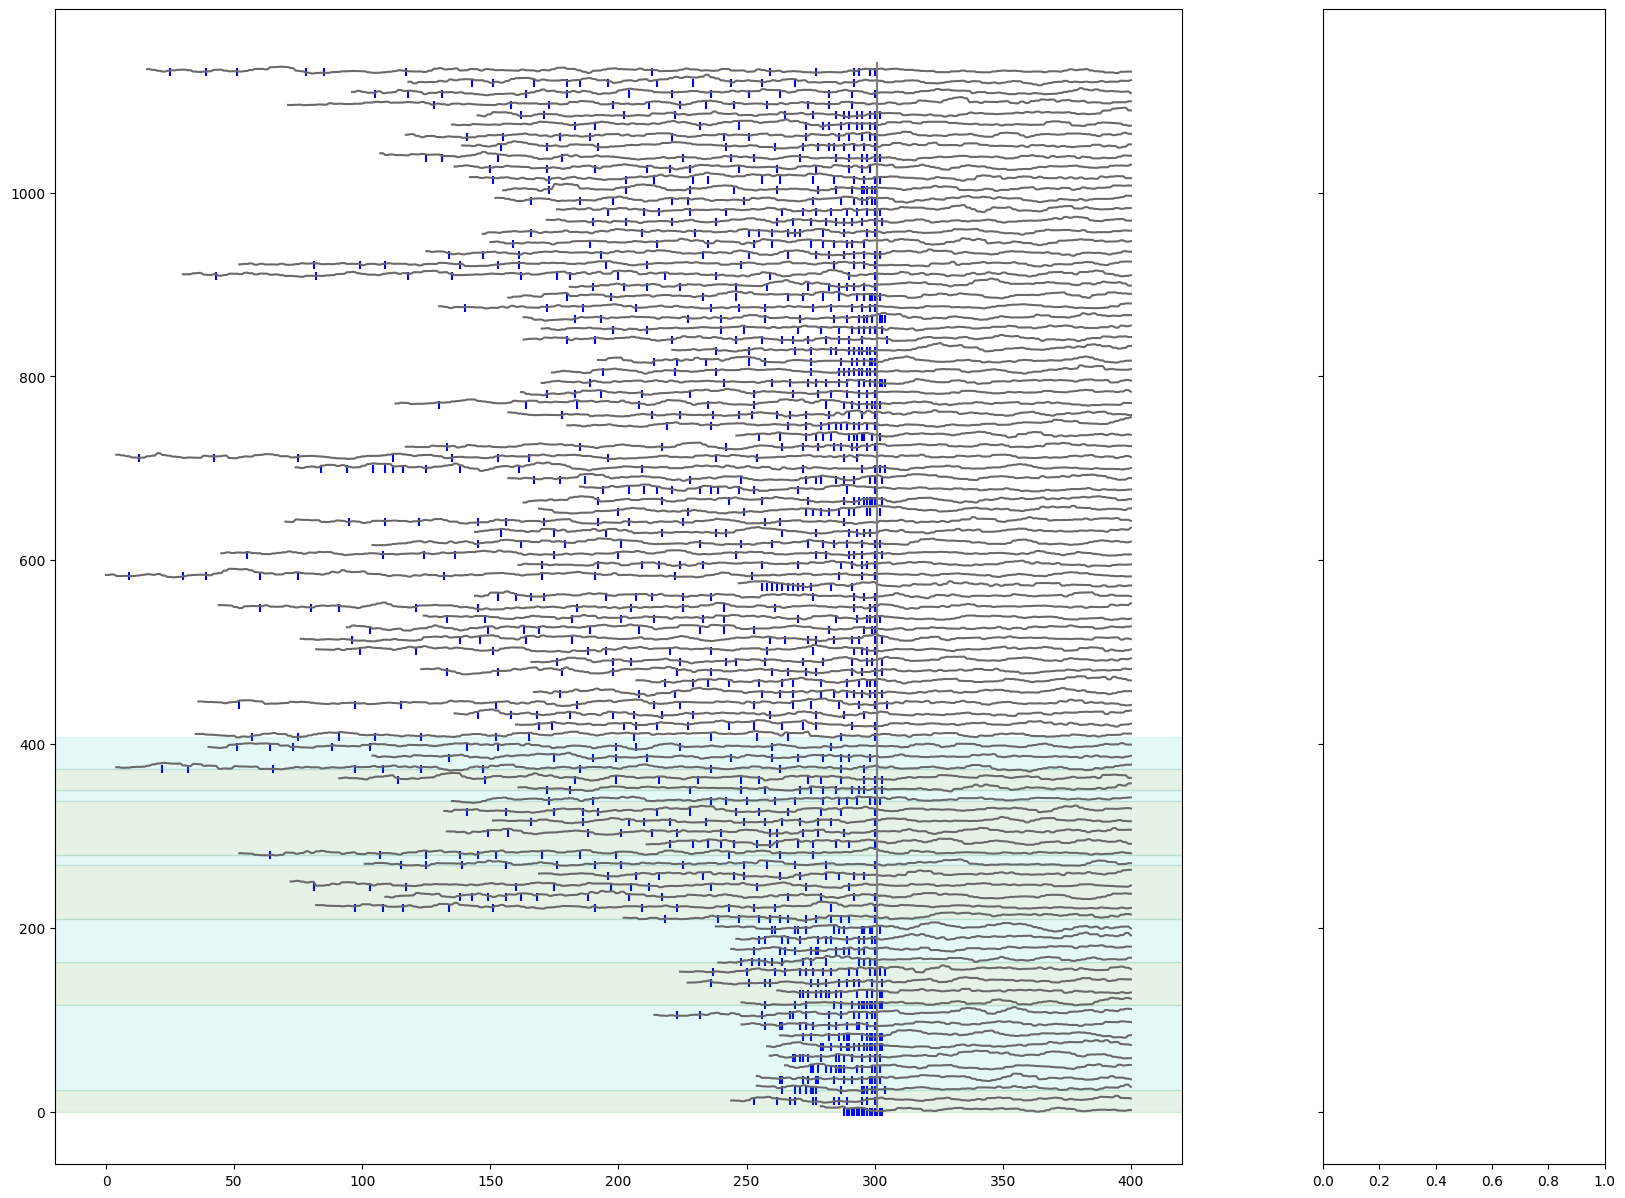

In [4]:
# Load metadata csv file
metadata = pd.read_csv(os.path.join(data_dir, 'bci_task_metadata', 'bci_metadata.csv'))
# Get all mice available
subject_ids = np.sort(metadata['subject_id'].unique())
# Select one mice
n_subjects = len(subject_ids)
subject_id = subject_ids[0]#754303


for subject_id in subject_ids[2:]:

    # Select one subject metadata, sorted by 'session_number'
    this_mouse_metadata = metadata[metadata['subject_id']==subject_id].sort_values(by='session_number')
    # Pick one session for this mouse
    session_names = this_mouse_metadata.name.values
    print('Selected subject is', subject_id)
    #print('Selected session is', session_name)

    for i_session_name in session_names:

        try:
            session = load.load_session_data(i_session_name)
       
            nwb_file =session['nwb_file']
            epoch_table =session['epoch_table']
            dff_traces =session['dff_traces']
            roi_table = session['roi_table']
            frame_rate =session['frame_rate']
            bci_trials =session['bci_trials']
            thresholds =session['thresholds']  

            # Select correct trials
            valid_bci_trials = processing.get_valid_bci_trials(bci_trials)
            correct_bci_trials = processing.correct_bci_trials(valid_bci_trials)
            correct_bci_trials= correct_bci_trials.reset_index()

            BCI_epochs = epoch_table[epoch_table.stimulus_name.str.contains('BCI')]
            start_bci_epoch = BCI_epochs.loc[BCI_epochs.index[0]].start_frame
            stop_bci_epoch = BCI_epochs.loc[BCI_epochs.index[0]].stop_frame
            start_bci_trial = correct_bci_trials['start_frame']-start_bci_epoch
            stop_bci_trial = correct_bci_trials['stop_frame']-start_bci_epoch
            thrcrossframe_bci_trial = np.round(correct_bci_trials['threshold_crossing_times']*frame_rate).astype(int)
            zaber_steps = np.round(np.array(correct_bci_trials['zaber_step_times'].tolist())*frame_rate)
            go_cue_bci = np.round(correct_bci_trials['go_cue']*frame_rate).astype(int)
            reward_time = np.round(correct_bci_trials['reward_time']*frame_rate).astype(int)

            low_thres =correct_bci_trials.low
            high_thres =correct_bci_trials.high

            # Select relevant epoch
            dff_bci = dff_traces[start_bci_epoch:stop_bci_epoch, :]
            dff_bci = dff_bci.T# Transpose so rows are ROI IDs

            # Remove ROIs with traces that are NaNs (note - this takes a few seconds)
            valid_trace_ids = [i for i in range(dff_traces.shape[1]) if np.isnan(dff_traces[0, i])==False]
            # Limit ROI table to non-NaN traces
            roi_table2 = roi_table.loc[valid_trace_ids]

            # Find the likely somatic ROIs
            soma_probability = 0.005 # Emperically determined threshold - just trust us
            # Limit to valid somatic ROIs
            valid_rois = roi_table2[roi_table2.soma_probability>soma_probability]
            target_roi_idx = bci_trials['closest_roi'].unique()
            print(f"CN: {target_roi_idx}")
            if len(target_roi_idx)>1:
                raise ValueError("More than one CN during BCI epoch")
            target_roi_idx=target_roi_idx[0]
            if not(target_roi_idx in valid_rois.index):
                valid_rois = pd.concat((valid_rois, roi_table2.loc[[target_roi_idx], :]), axis=0)
                valid_rois = valid_rois.sort_index()


            dff_bci_valid = dff_bci[valid_rois.index.values, :]
            roi_original_idx = valid_rois.reset_index()['id']
            cn_new_idx = roi_original_idx[roi_original_idx==target_roi_idx].index[0]

            # Smooth dff
            smoothing_window = 10
            smooth_dff_valid = np.full(dff_bci_valid.shape,np.nan)
            kernel = np.ones(smoothing_window) / smoothing_window
            for itr,trial in enumerate (dff_bci_valid):
                smooth_dff_valid[itr] = np.convolve(trial, kernel, mode='same')

            # Organize data by trials
            n_rois = smooth_dff_valid.shape[0]
            n_trials = len(start_bci_trial)
            max_tr_duration = np.max(stop_bci_trial-start_bci_trial)
            dff_by_trial = np.full((n_rois,n_trials,max_tr_duration*2),np.nan)
            for itr,(ist,istp) in enumerate(zip(start_bci_trial,stop_bci_trial)):

                dff_by_trial[:,itr,:int(istp-ist)] = smooth_dff_valid[:,ist:istp]

            # Let's align on threshold_crossing_times
            frames_before = int(np.max(thrcrossframe_bci_trial.values))
            shifts = thrcrossframe_bci_trial.values -frames_before
            dff_bci_alignon_thr = indep_roll(dff_by_trial,-shifts,axis=-1)


            idx_change_thre = np.insert(np.where(np.insert(np.diff(high_thres), 0, 0)),0,0)
            idx_change_thre=np.append(idx_change_thre,n_trials)

            cn=True
            save=True
            colors=['g','c']*5


            i_roi = cn_new_idx
            original_roi = roi_original_idx.loc[i_roi]
            roi_dff_bci_alignon_thr = dff_bci_alignon_thr[i_roi]
            max_act = np.nanmax(roi_dff_bci_alignon_thr)
            ntrials = roi_dff_bci_alignon_thr.shape[0]

            traces.plot_lick_spout_steps_dff(dff_signal=roi_dff_bci_alignon_thr,zaber_steps=zaber_steps-shifts.reshape(-1,1).astype(int),frames_before=frames_before,idx_threshold_change=idx_change_thre,subject_id=subject_id,session_name=i_session_name,i_roi=original_roi,cn=cn,colors=colors,save=save)

            fig,ax=plt.subplots(figsize=(22,8))
            plt.pcolormesh(dff_bci_alignon_thr[i_roi,:,:max_tr_duration],cmap='magma',vmin=0,vmax=5)
            plt.colorbar(label='dFF')
            ax.vlines([frames_before],[0],[n_trials],'b',linestyle='--')
            plt.xlabel('2P frames')
            plt.ylabel('Trials')
            plt.title(f'BCI ROI nº{original_roi}')
            ax.set_xticks([frames_before-100,frames_before])
            ax.set_xticklabels(['-100','0'])
            ax.set_xlabel('Frames aligned on threshold crossing time')

            if save:
                if cn:
                    original_roi = str(original_roi)+'CN'
                subdir = f'{subject_id}/{i_session_name}'
                output = Path(f'{savepath}/{subdir}')
                output.mkdir(parents=True, exist_ok=True)
                figname= f'ddf_aligned_on_threshold_ROI{original_roi}.{save_format}'
                fig.savefig(output/figname,format=save_format,bbox_inches="tight")
            plt.close('all')
        except:
            print(i_session_name)
            continue
